In [13]:
economic <- read.csv(file='economic.csv', header=TRUE, sep=",")

# Print the first six rows
print("head")
head(economic, 6)

[1] "head"


,wage_growth,inflation,unemployment,economy,education,gdp
,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
1,7.30,4.49,3.56,no_recession,college,6.27
2,9.05,9.59,2.42,no_recession,college,9.44
3,10.08,11.36,1.23,no_recession,post_graduate,18.29
4,10.98,9.55,1.18,no_recession,post_graduate,19.96
5,8.54,8.63,2.54,no_recession,high_school,8.43
6,9.75,8.26,2.22,no_recession,college,17.85


## Scatterplot Wage vs. Unemployment

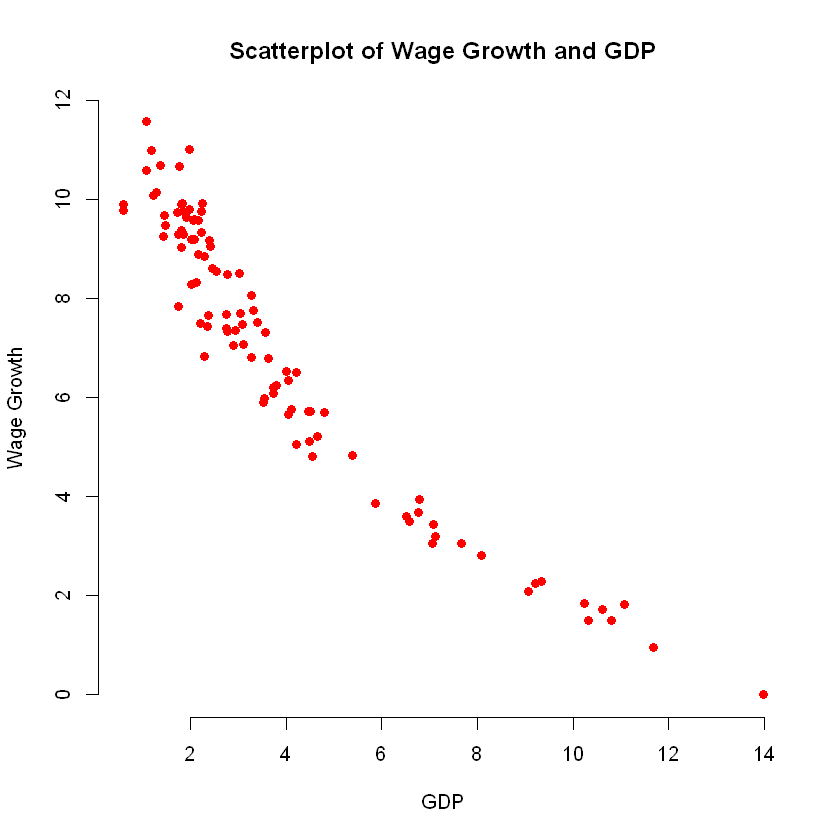

In [14]:
plot(economic$unemployment, economic$wage_growth, 
     main = "Scatterplot of Wage Growth and GDP",
     xlab = "GDP", ylab = "Wage Growth",
     col="red", 
     pch = 19, frame = FALSE)

# One Quantitative Var. Second Order Regression Model, Stats

In [33]:
model1 <- lm(wage_growth ~ unemployment + I(unemployment^2), data=economic)
summary(model1)


Call:
lm(formula = wage_growth ~ unemployment + I(unemployment^2), 
    data = economic)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.7515 -0.4407  0.0601  0.4287  1.9382 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)       12.234206   0.208069   58.80  < 2e-16 ***
unemployment      -1.743170   0.091052  -19.14  < 2e-16 ***
I(unemployment^2)  0.067408   0.007287    9.25 6.07e-15 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.6681 on 96 degrees of freedom
Multiple R-squared:  0.9436,	Adjusted R-squared:  0.9424 
F-statistic:   803 on 2 and 96 DF,  p-value: < 2.2e-16


## Prediction & Intervals

In [34]:
newdata <- data.frame(unemployment=2.54)

print("prediction interval")
prediction_pred_int <- predict(model1, newdata, interval="predict", level=0.90) 
round(prediction_pred_int,4)

print("confidence interval")
prediction_conf_int <- predict(model1, newdata, interval="confidence", level=0.90) 
round(prediction_conf_int,4)

[1] "prediction interval"


,fit,lwr,upr
1,8.2414,7.1249,9.358


[1] "confidence interval"


,fit,lwr,upr
1,8.2414,8.1177,8.3651


# Two Quantiative Vars. Second Order Regresson Model, Stats

In [21]:
# Create the second order regression model and print the statistics
model2 <- lm(wage_growth ~ unemployment + gdp + unemployment:gdp + I(unemployment^2) + I(gdp^2) , data=economic)
summary(model2)


Call:
lm(formula = wage_growth ~ unemployment + gdp + unemployment:gdp + 
    I(unemployment^2) + I(gdp^2), data = economic)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.37686 -0.35318  0.01594  0.33860  1.55345 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)        8.989434   1.014702   8.859 5.30e-14 ***
unemployment      -1.152823   0.244170  -4.721 8.26e-06 ***
gdp                0.283691   0.140811   2.015  0.04682 *  
I(unemployment^2)  0.037685   0.013069   2.884  0.00489 ** 
I(gdp^2)          -0.006599   0.004299  -1.535  0.12815    
unemployment:gdp  -0.006282   0.021119  -0.297  0.76678    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.5807 on 93 degrees of freedom
Multiple R-squared:  0.9587,	Adjusted R-squared:  0.9565 
F-statistic:   432 on 5 and 93 DF,  p-value: < 2.2e-16


## Prediction & Intervals

In [23]:
newdata <- data.frame(unemployment=2.50, gdp=6.50)

print("prediction interval")
prediction_pred_int <- predict(model2, newdata, interval="predict", level=0.90) 
round(prediction_pred_int,4)

print("confidence interval")
prediction_conf_int <- predict(model2, newdata, interval="confidence", level=0.90) 
round(prediction_conf_int,4)

[1] "prediction interval"


,fit,lwr,upr
1,7.806,6.8234,8.7886


[1] "confidence interval"


,fit,lwr,upr
1,7.806,7.6195,7.9925


# One Quantiative and One Qualitative Var. Second Order Regresson Model, Stats

In [29]:
# Create the second order regression model and print the statistics
model3 <- lm(wage_growth ~ unemployment + economy + unemployment:economy + I(unemployment^2) + I(unemployment^2):economy, data=economic)
summary(model3)


Call:
lm(formula = wage_growth ~ unemployment + economy + unemployment:economy + 
    I(unemployment^2) + I(unemployment^2):economy, data = economic)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.77220 -0.35522  0.04877  0.42602  1.90778 

Coefficients:
                                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)                        12.36072    0.27055  45.687  < 2e-16 ***
unemployment                       -1.80834    0.14236 -12.703  < 2e-16 ***
economyrecession                   -2.70404    1.08221  -2.499   0.0142 *  
I(unemployment^2)                   0.07574    0.01460   5.188 1.24e-06 ***
unemployment:economyrecession       0.69359    0.30901   2.245   0.0272 *  
economyrecession:I(unemployment^2) -0.04358    0.02206  -1.976   0.0512 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.6551 on 93 degrees of freedom
Multiple R-squared:  0.9475,	Adjusted R-squared:  0.9446 
F-statistic: 33

## Prediction & Intervals

In [31]:
newdata <- data.frame(unemployment=2.50, economy='no_recession')

print("prediction interval")
prediction_pred_int <- predict(model3, newdata, interval="predict", level=0.90) 
round(prediction_pred_int,4)

print("confidence interval")
prediction_conf_int <- predict(model3, newdata, interval="confidence", level=0.90) 
round(prediction_conf_int,4)

[1] "prediction interval"


,fit,lwr,upr
1,8.3132,7.2171,9.4094


[1] "confidence interval"


,fit,lwr,upr
1,8.3132,8.1827,8.4437
